# Tarefa 4 - Limpeza e Transformação

## Importando os dados

In [1]:
import pandas as pd
from IPython.display import clear_output
from concat_df import concat_df

df = concat_df()
df.head()

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year
0,2753519,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,411,2009
1,2753520,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,429,2009
2,2753521,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,109,2009
3,2753522,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,68,2009
4,2753523,0,2009-09-25 00:00:00,1772,PSB,SP,Abelardo Camarinha,2.418000e+12,Fuels and lubricants.,AUTO POSTO ALVORADA,4395,2009


## Transformação de Dados

### Tranformação de Tipos

In [2]:
df = df.astype({"receipt_social_security_number": str})
df.head()

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year
0,2753519,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,411,2009
1,2753520,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,429,2009
2,2753521,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,109,2009
3,2753522,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,68,2009
4,2753523,0,2009-09-25 00:00:00,1772,PSB,SP,Abelardo Camarinha,2418000000131.0,Fuels and lubricants.,AUTO POSTO ALVORADA,4395,2009


In [3]:
df['receipt_date'] = pd.to_datetime(df['receipt_date'])
df['month'] = df['receipt_date'].dt.month

df.head(5)

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month
0,2753519,0,2009-05-19,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,411,2009,5
1,2753520,0,2009-05-19,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,429,2009,5
2,2753521,0,2009-05-19,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,109,2009,5
3,2753522,0,2009-05-19,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,68,2009,5
4,2753523,0,2009-09-25,1772,PSB,SP,Abelardo Camarinha,2418000000131.0,Fuels and lubricants.,AUTO POSTO ALVORADA,4395,2009,9


### Redimensionando

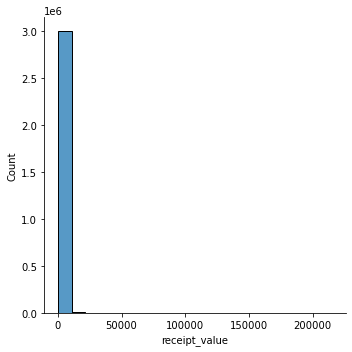

In [4]:
import seaborn as sns

sns.displot(df, x="receipt_value", bins=20)

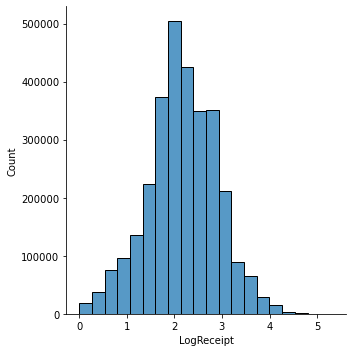

In [5]:
import numpy as np

df_receipt = df[df["receipt_value"] > 0].copy()
df_receipt["LogReceipt"] = np.log10(df_receipt["receipt_value"])
sns.displot(df_receipt, x="LogReceipt", bins=20)

In [6]:
df_receipt.sort_values("receipt_value", ascending=False).head(5)

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,LogReceipt
34449,1479100,0,2012-12-14,292,PTB,SP,Arnaldo Faria De Sá,5511195000158.0,Dissemination of the Parliamentary Activity.,BALCOLOR DIGITAL ATELIER GRAFICO LTDA,215000,2012,12,5.332438
30802,390710,0,2014-12-19,292,PTB,SP,Arnaldo Faria De Sá,54450705000130.0,Dissemination of the Parliamentary Activity.,GRÁFICA TRÊS PONTAS,208320,2014,12,5.318731
34364,34364,0,2013-12-27,292,PTB,SP,Arnaldo Faria De Sá,5511195000158.0,Dissemination of the Parliamentary Activity.,BALCOLOR DIGITAL ATELIER GRAFICO LTDA,197370,2013,12,5.295281
36334,724095,0,2011-12-19,292,PTB,SP,Arnaldo Faria De Sá,5511195000158.0,Dissemination of the Parliamentary Activity.,BALCOLOR,197000,2011,12,5.294466
35989,723750,0,2011-12-26,974,PT,SP,Arlindo Chinaglia,9023310000104.0,Dissemination of the Parliamentary Activity.,ALL WIN PROPAGANDA LTDA,194100,2011,12,5.288026


As colunas que precisaram de transformação foram: **receipt_social_security_number,receipt_date e receipt_value**. 

Em **receipt_social_security_number** que  era um atributo do tipo float foi transformado para o tipo string. Ou seja, aconteceu uma transformação de um tipo de dado. 

Já com o **receipt_date**, este foi transformado para o tipo datetime pois estava como object.  

Por fim, o **receip_value** possuia muitos valores pequenos valores concatenados em uma pequena proporção de intervalo de valores. Então, foi realizado um redimensionamento para reduzir essa diferenção desproporcional e para realizar uma melhor  análise dos valores. 



converter o security number para string -> O mesmo tem dados faltantes(observar o que fazer)

transformar dos dados da data -> Dia da semana e mês

receipt_value -> seguir uma distribuição mais uniforme (o que o professor fez em redimensionamento) 

conferir dados faltantes - (preencher ou dropar) - null, nan, vazio

conferir dados duplicados



Quais colunas precisaram de transformação? Que métodos foram utilizados nas colunas?

## Limpeza de Dados

### Dados Faltantes

In [7]:
df.isnull().sum()

Unnamed: 0                        0
bugged_date                       0
receipt_date                      0
deputy_id                         0
political_party                   0
state_code                        0
deputy_name                       0
receipt_social_security_number    0
receipt_description               0
establishment_name                0
receipt_value                     0
year                              0
month                             0
dtype: int64

In [8]:
df.isna().sum()

Unnamed: 0                        0
bugged_date                       0
receipt_date                      0
deputy_id                         0
political_party                   0
state_code                        0
deputy_name                       0
receipt_social_security_number    0
receipt_description               0
establishment_name                0
receipt_value                     0
year                              0
month                             0
dtype: int64

### Dados Duplicados

In [ ]:
df[df.duplicated(keep = False)]